In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [2]:
data=pd.read_csv('../../Datasets/mobile-data/train.csv')
test= pd.read_csv('../../Datasets/mobile-data/test.csv')
data.head().T

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 46 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   battery_power                                  2000 non-null   int64  
 1   bluetooth                                      2000 non-null   int64  
 2   clock_speed                                    2000 non-null   float64
 3   dual_sim                                       2000 non-null   int64  
 4   front_camera                                   2000 non-null   int64  
 5   4g                                             2000 non-null   int64  
 6   internal_memory                                2000 non-null   int64  
 7   mobile_depth                                   2000 non-null   float64
 8   mobile_weight                                  2000 non-null   int64  
 9   number_of_cores                                2000 

In [47]:
modified_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   battery_power                                  1000 non-null   int64  
 1   bluetooth                                      1000 non-null   int64  
 2   clock_speed                                    1000 non-null   float64
 3   dual_sim                                       1000 non-null   int64  
 4   front_camera                                   1000 non-null   int64  
 5   4g                                             1000 non-null   int64  
 6   internal_memory                                1000 non-null   int64  
 7   mobile_depth                                   1000 non-null   float64
 8   mobile_weight                                  1000 non-null   int64  
 9   number_of_cores                                1000 n

In [7]:
modified_test=test.drop(columns=['id'],axis=1)

In [10]:
data.rename(columns={'blue':'bluetooth','fc':'front_camera','four_g':'4g','int_memory':'internal_memory',
                   'm_dep':'mobile_depth','n_cores':'number_of_cores','pc':'primary_camera',
                   'px_height':'pixel_height','px_width':'pixel_width','sc_h':'screen_height',
                   'sc_w':'screen_width','three_g':'3g','mobile_wt':'mobile_weight'},inplace=True)
modified_test.rename(columns={'blue':'bluetooth','fc':'front_camera','four_g':'4g','int_memory':'internal_memory',
                   'm_dep':'mobile_depth','n_cores':'number_of_cores','pc':'primary_camera',
                   'px_height':'pixel_height','px_width':'pixel_width','sc_h':'screen_height',
                   'sc_w':'screen_width','three_g':'3g','mobile_wt':'mobile_weight'},inplace=True)

In [ ]:
data['screen_size']=np.sqrt(np.pow(data['screen_height'],2)*np.pow(data['screen_width'],2)).astype(float)/2.54
modified_test['screen_size']=np.sqrt(np.pow(modified_test['screen_height'],2)*np.pow(modified_test['screen_width'],2)).astype(float)/2.54

n

In [13]:
def categorize_performance(cores,clock_speed):
    if cores <= 2 and clock_speed < 1.5:
        return 1
    elif 4 <= cores <= 6 and 1.5 <= clock_speed <= 2.2:
        return 2
    elif 6 <= cores <= 8 and 2.2 < clock_speed < 2.8:
        return 3
    elif cores >= 8 and clock_speed >= 2.8:
        return 4
    else:
        return 0  # For edge cases
    
data['performance_tier'] = data.apply(lambda x: categorize_performance(x['number_of_cores'], x['clock_speed']), axis=1)
modified_test['performance_tier'] = modified_test.apply(lambda x: categorize_performance(x['number_of_cores'], x['clock_speed']), axis=1)

In [14]:
def categorize_depth(depth_cm):
    if depth_cm < 0.2:
        return 0
    elif 0.2 <= depth_cm < 0.5:
        return 1
    elif 0.5 <= depth_cm < 0.8:
        return 2
    else:
        return 3

data['depth_category'] = data['mobile_depth'].apply(categorize_depth)
modified_test['depth_category'] = modified_test['mobile_depth'].apply(categorize_depth)

In [16]:
def categorize_weight(weight_g):
    if weight_g < 109:
        return 0
    elif 109 <= weight_g < 141:
        return 1
    elif 141 <= weight_g < 170:
        return 2
    else:
        return 3

data['weight_category'] = data['mobile_weight'].apply(categorize_weight)
modified_test['weight_category'] = modified_test['mobile_weight'].apply(categorize_weight)

In [17]:
data['pixel_height']=data['pixel_height'].replace(0,data['pixel_height'].median())
modified_test['pixel_height']=modified_test['pixel_height'].replace(0,modified_test['pixel_height'].median())

In [18]:
def categorize_resolution(height, width):
    # Categorize height
    if height < 283:
        height_tier = "Very Low"
    elif 283 <= height < 564:
        height_tier = "Low (HD-)"
    elif 564 <= height < 948:
        height_tier = "Mid (HD/HD+)"
    elif 948 <= height < 1440:
        height_tier = "High (FHD+)"
    else:
        height_tier = "Very High (QHD+)"
    
    # Categorize width
    if width < 875:
        width_tier = "Narrow"
    elif 875 <= width < 1247:
        width_tier = "Standard"
    elif 1247 <= width < 1633:
        width_tier = "Wide"
    else:
        width_tier = "Ultra-Wide"
    
    return f"{height_tier} | {width_tier}"

# Apply to DataFrame
data['resolution_tier'] = data.apply(lambda x: categorize_resolution(x['pixel_height'], x['pixel_width']), axis=1)
modified_test['resolution_tier'] = modified_test.apply(lambda x: categorize_resolution(x['pixel_height'], x['pixel_width']), axis=1)

In [21]:
data = pd.get_dummies(data=data, columns=['resolution_tier'], drop_first=True,dtype='int')
modified_test = pd.get_dummies(data=modified_test, columns=['resolution_tier'], drop_first=True,dtype='int')

In [22]:
def categorize_camera(mp):
    if mp == 0:
        return 0
    elif 0 < mp <= 5:
        return 1
    elif 5 < mp <= 12:
        return 2
    elif 12 < mp <= 20:
        return 3
    else:
        return 4

# Apply to both camera columns
data['front_camera_category'] = data['front_camera'].apply(categorize_camera)
data['primary_camera_category'] = data['primary_camera'].apply(categorize_camera)

modified_test['front_camera_category'] = modified_test['front_camera'].apply(categorize_camera)
modified_test['primary_camera_category'] = modified_test['primary_camera'].apply(categorize_camera)

In [23]:
def categorize_storage(size):
    if size < 8:
        return 1
    elif 8 <= size < 32:
        return 2
    elif 32 <= size < 64:
        return 3
    else:
        return 4

data['storage_category'] = data['internal_memory'].apply(categorize_storage)
modified_test['storage_category']=modified_test['internal_memory'].apply(categorize_storage)

In [24]:
# RAM categorization (convert MB to GB for readability)
def categorize_ram(ram_mb):
    ram_gb = ram_mb / 1024
    if ram_gb < 1:
        return 0
    elif 1 <= ram_gb < 2:
        return 1
    elif 2 <= ram_gb < 3:
        return 2
    elif 3 <= ram_gb < 4:
        return 3
    else:
        return 4

data['ram_category'] = data['ram'].apply(categorize_ram)
modified_test['ram_category'] =modified_test['ram'].apply(categorize_ram)

In [25]:
def categorize_network(three_g,four_g):
    if three_g==1 and four_g==1:
        return 3
    elif three_g==1:
        return 1
    elif four_g==1:
        return 2
    else:
        return 0

data['network_category'] = data.apply(lambda x:categorize_network(x['3g'],x['4g']), axis=1)
modified_test['network_category'] = modified_test.apply(lambda x:categorize_network(x['3g'],x['4g']),axis=1)

In [28]:
x=data.drop(columns=['price_range'],axis=1)
y=data['price_range']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=100)

In [30]:
lreg= LogisticRegression(
    solver='newton-cg',
    penalty='l2',           # Newton-CG only supports L2 regularization
    C=0.1,                  # Inverse of regularization strength
    max_iter=100,           # Maximum number of iterations
    tol=1e-4,               # Tolerance for stopping criteria
    multi_class='auto'      # Automatically handles multiclass
)

In [31]:
lreg.fit(x_train,y_train)

C:\Users\TIFA\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\TIFA\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.12289306509635865. Increase the number of iterations.
  warnings.warn(


LogisticRegression(C=0.1, multi_class='auto', solver='newton-cg')

In [ ]:

print('Model Accuracy:', accuracy_score(y_test, lreg.predict(x_test)))

Model Accuracy: 0.955


In [33]:
train_accuracy = accuracy_score(y_train, lreg.predict(x_train))
test_accuracy = accuracy_score(y_test, lreg.predict(x_test))

print(f"Train Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

Train Accuracy: 0.981
Test Accuracy: 0.955


In [34]:
best_lreg = LogisticRegression(
    solver='newton-cg',
    C=0.01,          # Best value from your test
    max_iter=1000,
    tol=1e-4
).fit(x_train, y_train)

print(f"Final Test Accuracy: {accuracy_score(y_test, best_lreg.predict(x_test)):.3f}")

Final Test Accuracy: 0.970


In [35]:
print(f"New Train Accuracy: {accuracy_score(y_train, best_lreg.predict(x_train)):.3f}")
print(f"New Test Accuracy: {accuracy_score(y_test, best_lreg.predict(x_test)):.3f}")

New Train Accuracy: 0.988
New Test Accuracy: 0.970


In [36]:
print(classification_report(y_test, best_lreg.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      0.93      0.96        44
           2       0.89      1.00      0.94        50
           3       1.00      0.95      0.97        58

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



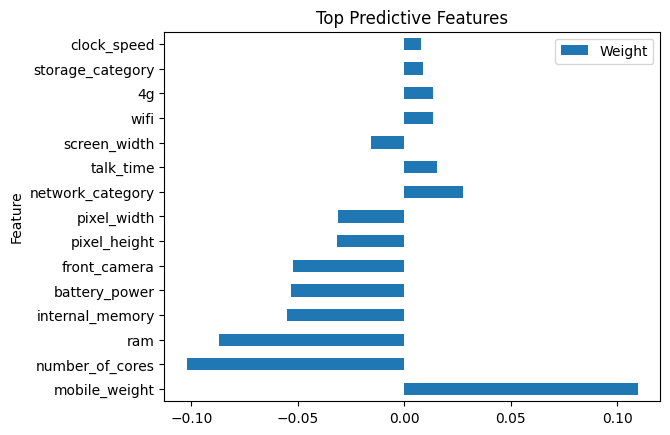

In [37]:
coefs = pd.DataFrame({
    'Feature': x_train.columns,
    'Weight': best_lreg.coef_[0]
}).sort_values('Weight', key=abs, ascending=False)

# Plot top features
coefs.head(15).plot.barh(x='Feature', y='Weight')
plt.title('Top Predictive Features')
plt.show()

In [48]:
test_pred=lreg.predict(modified_test)

In [49]:
submission=pd.DataFrame({
    'Phone_ID':test['id'],
    'Price_Range':test_pred
})
submission.to_csv('submission.csv',index=False)
print('File Submitted Successfully')

File Submitted Successfully
